In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv


In [149]:

#S1C1 = pd.read_csv("Datos_S1_C1.csv", header=None, sep='\t')
#S1C2 = pd.read_csv("Datos_S1_C2.csv", header=None, sep='\t')
#S1C3 = pd.read_csv("Datos_S1_C3.csv", header=None, sep='\t')
#S1C4 = pd.read_csv("Datos_S1_C4.csv", header=None, sep=',')
#S1C5 = pd.read_csv("Datos_S1_C5.csv", header=None, sep=',')
#S1C6 = pd.read_csv("Datos_S1_C6.csv", header=None, sep='\t')
S1C1 = pd.read_csv("Datos_S1_C1_IPT2.csv", header=None, sep='\t')
S1C2 = pd.read_csv("Datos_S1_C2_IPT2.csv", header=None, sep='\t')
S1C3 = pd.read_csv("Datos_S1_C3_IPT2.csv", header=None, sep='\t')
S1C4 = pd.read_csv("Datos_S1_C4_IPT2.csv", header=None, sep='\t')


S1C5 = pd.read_csv("Datos_S1_C1.csv", header=None, sep='\t')
S1C6 = pd.read_csv("Datos_S1_C2.csv", header=None, sep='\t')
S1C7 = pd.read_csv("Datos_S1_C3.csv", header=None, sep='\t')


#Sens = pd.concat([S1, S2, S3, S4, S5]).sort_index()
S1C1['C'] = 1
S1C2['C'] = 2
S1C3['C'] = 3
S1C4['C'] = 4
S1C5['C'] = 5
S1C6['C'] = 6
S1C7['C'] = 7
#S1C8['C'] = 8

#Sens = pd.concat([S1C1,S1C2,S1C3,S1C4,S1C5,S1C6,S1C8])
Sens = pd.concat([S1C1,S1C2,S1C3,S1C4,S1C5,S1C6,S1C7])

Sens.columns = ['S1','S2','S3','Date','I','C']

Sens = Sens.dropna();

Sens = Sens.sort_values(by=['I'])


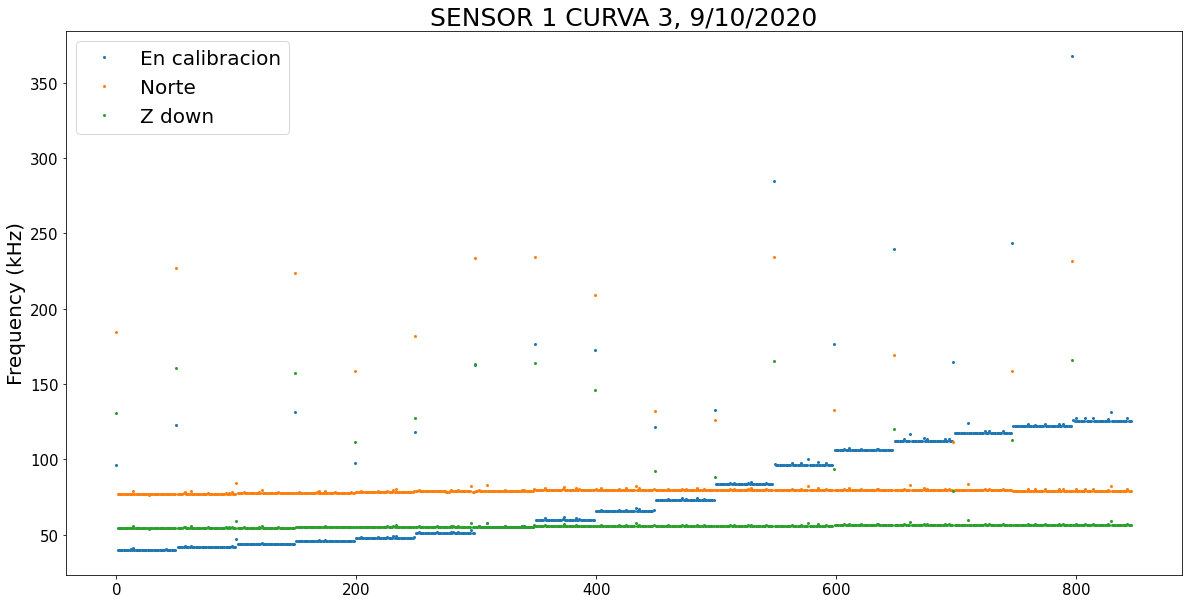

In [150]:
Inten = Sens.I.drop_duplicates()

Y1=Inten.iloc[0]

plt.figure(figsize=(20,10))

Ss=5

plt.plot(Sens[Sens['C']==Ss].S1/1000,'o',ms=2,label='En calibracion')

plt.plot(Sens[Sens['C']==Ss].S3/1000,'o',ms=2,label='Norte')

plt.plot(Sens[Sens['C']==Ss].S2/1000,'o',ms=2,label='Z down')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.ylabel('Frequency (kHz)',fontsize=20)

plt.title('SENSOR 1 CURVA 3, 9/10/2020',fontsize=25)

plt.legend(fontsize=20)

#plt.savefig('Curva_sensor_1_curva_3.png',dpi=100)

In [151]:
Inten

797   -0.08100
478   -0.08080
845   -0.08000
808   -0.07980
847   -0.07810
780   -0.07110
750   -0.07080
758   -0.07060
763   -0.07050
750   -0.07040
501   -0.07020
735   -0.06110
569   -0.06090
735   -0.06040
748   -0.06030
746   -0.06020
710   -0.05980
670   -0.05040
663   -0.05030
684   -0.05020
670   -0.05000
618   -0.04970
601   -0.04040
640   -0.04020
633   -0.04010
599   -0.03088
597   -0.03058
721   -0.03026
554   -0.03020
585   -0.03016
        ...   
222    0.04010
214    0.04030
248    0.04050
236    0.04060
244    0.04090
164    0.05020
186    0.05030
187    0.05040
163    0.05050
186    0.05070
159    0.05090
104    0.05970
148    0.06010
112    0.06020
145    0.06040
126    0.06050
127    0.06060
149    0.06090
81     0.06950
96     0.07020
70     0.07030
68     0.07070
85     0.07080
94     0.07100
48     0.07970
28     0.07980
13     0.07990
14     0.08010
2      0.08030
14     0.08090
Name: I, Length: 94, dtype: float64

In [152]:
from scipy.stats import mode
N=np.size(Sens.S1)
Ni=0
Nf=N

Sens= Sens.iloc[Ni:Nf]

S = pd.DataFrame(columns=['S1','S2','S3','Date','I','C'])

j = 0

Archivo = "Estadistica.csv"

with open(Archivo, 'a') as csvFile:

    for i in range(0,np.size(Inten)):

        X = Sens.loc[Sens['I'] == Inten.iloc[i]]
        
        print(mode(X.S1))
        
        dts = [np.median(X.S1),np.mean(X.S1),np.std(X.S1),mode(X.S1)[0],np.quantile(X.S1,0.25),np.quantile(X.S1,.75)]
        writer = csv.writer(csvFile,delimiter='\t', lineterminator='\n')
        writer.writerow(dts)
        dts = []

        for n in range(len(X.S1.values)-1):

            R = abs(X.S1.values[n]-X.S1.values[n+1])

            if R<2000:
            #print(ahora)
                S.loc[j] = X.iloc[n]
                j += 1
            #aora = time.strftime("%c")
    csvFile.close()


ModeResult(mode=array([126250], dtype=int64), count=array([5]))
ModeResult(mode=array([124736], dtype=int64), count=array([3]))
ModeResult(mode=array([125698], dtype=int64), count=array([3]))
ModeResult(mode=array([135554], dtype=int64), count=array([3]))
ModeResult(mode=array([131056], dtype=int64), count=array([2]))
ModeResult(mode=array([129144], dtype=int64), count=array([2]))
ModeResult(mode=array([121924], dtype=int64), count=array([3]))
ModeResult(mode=array([121750], dtype=int64), count=array([3]))
ModeResult(mode=array([129432], dtype=int64), count=array([2]))
ModeResult(mode=array([128080], dtype=int64), count=array([2]))
ModeResult(mode=array([120148], dtype=int64), count=array([3]))
ModeResult(mode=array([121674], dtype=int64), count=array([3]))
ModeResult(mode=array([115902], dtype=int64), count=array([4]))
ModeResult(mode=array([121654], dtype=int64), count=array([3]))
ModeResult(mode=array([121880], dtype=int64), count=array([5]))
ModeResult(mode=array([117384], dtype=in

In [153]:
Sens1 = S[S.C == 1][1:]
Sens2 = S[S.C == 2][1:]
Sens3 = S[S.C == 3][1:]
Sens4 = S[S.C == 4][1:]
Sens5 = S[S.C == 5][1:]
Sens6 = S[S.C == 6][1:]
Sens7 = S[S.C == 7][1:]

#Sens3_sB = S[S.C == 4][1:]


In [154]:
Inten1 = Sens1.I.drop_duplicates()
Y1=Inten1.iloc[0]

Inten2 = Sens2.I.drop_duplicates()
Y2=Inten2.iloc[0]

Inten3 = Sens3.I.drop_duplicates()
Y3=Inten3.iloc[0]

Inten4 = Sens4.I.drop_duplicates()
Y4=Inten4.iloc[0]

Inten5 = Sens5.I.drop_duplicates()
Y5=Inten5.iloc[0]

Inten6 = Sens6.I.drop_duplicates()
Y6=Inten6.iloc[0]

Inten7 = Sens7.I.drop_duplicates()
Y7=Inten7.iloc[0]

#Inten8 = Sens8.I.drop_duplicates()
#Y8=Inten8.iloc[0]

#Inten3_sB = Sens3_sB.I.drop_duplicates()
#Y3_sB=Inten3_sB.iloc[0]


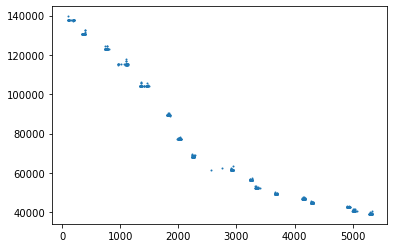

In [155]:
%matplotlib inline

plt.plot(Sens4.S1,'o',ms=1)

In [156]:
from sympy import *

init_printing(pretty_print=true)

from sympy.vector import CoordSys3D
N = CoordSys3D('N')

import scipy.integrate as integ
import mpmath as mp

import numpy as np

#CALCULO DE CAMPO MAGNETICO GENERADO POR UNA HELICE, PRESENTACION DEL MODELO 
#Radio helice
R= var('R')

#Espaciamiento
a= var('a')

#Variables
phi = Symbol('phi') #Unico parametro de la curva

#Curva parametrizada,  helice
c = R*cos(phi)*N.i+R*sin(phi)*N.j+(a/(2*pi))*phi*N.k

#vector tangente diferencial
l= c.diff(phi)

#Posicion de medicion
x=var('x');y=var('y');z=var('z');
r= x*N.i+y*N.j+z*N.k

#Corriente
I = var('I')

#Permeabilidad del vacio
mu = var('\mu_{0}')

#Diferencia entre posicion de medicion y posicion fuente
eta = r - c

#CON VARIABLES DEFINIDAS PARA RESOLVER EL MODELO
#R= 0.045 #m
#Diametro Interno
D=0.0433
R1=D/2

#Diametro externo
D2=0.0595
R2=D2/2

R=(R1+R2)/2
print(R)
#Espaciamiento
a = 0.002 #m

#Curva parametrizada,  helice
c = R*cos(phi)*N.i+R*sin(phi)*N.j+(a/(2*pi))*phi*N.k

#vector tangente diferencial
l= c.diff(phi)

#COrriente
#I = 500*10**(-6) #Ampere

#Permeabilidad del vacio
mu = 4*pi*10**(-7)

#Medicion
r= x*N.i+y*N.j+z*N.k

#Diferencia entre posicion de medicion y posicion fuente
eta = r - c

0.0257


In [157]:
#FUNCION PARA CALCULAR EL CAMPO CREADO POR EL HELICOIDE EN PUNTOS X,Y,Z

def CampoB(x,y,z,I):
                #PUNTO de Medicion
        r= x*N.i+y*N.j+z*N.k
        
        #Diferencia entre posicion de medicion y posicion fuente
        eta = r - c
        
        INT=((l.cross(eta))/((sqrt(eta.dot(eta)))**3))
        
        INTx= INT.dot(N.i)
        INTy= INT.dot(N.j)
        INTz= INT.dot(N.k)
        
        intX= lambdify (phi, INTx, 'mpmath')
        intY= lambdify (phi, INTy, 'mpmath')
        intZ= lambdify (phi, INTz, 'mpmath')

        Ix=sympify(mp.quad(intX,[-200*mp.pi,200*mp.pi]))
        Iy=sympify(mp.quad(intY,[-200*mp.pi,200*mp.pi]))
        Iz=sympify(mp.quad(intZ,[-200*mp.pi,200*mp.pi]))
        
        #Permeabilidad del vacio
        mu = 4*pi*10**(-7)

        K=(mu*I)/(4*pi).evalf()

        Bx=K*Ix.evalf()
        Bxer=K*Ix
        
        By=K*Iy.evalf()
        Byer=K*Iy

        Bz=K*Iz.evalf()
        #Bzer=K*Iz
        #B=Bx*N.i+By*N.j+Bz*N.k
        B=[Bx.evalf(),By.evalf(),Bz.evalf()]
        return B
    
def intX(phi,x,y,z):
     return (-0.0005*(y - 0.045*sin(phi))/pi + 0.045*(-0.0005*phi/pi + z)*cos(phi))/((x - 0.045*cos(phi))**2 + (y - 0.045*sin(phi))**2 + (-0.0005*phi/pi + z)**2)**(3/2)
    
def intY(phi,x,y,z):
     return (0.0005*(x - 0.045*cos(phi))/pi + 0.045*(-0.0005*phi/pi + z)*sin(phi))/((x - 0.045*cos(phi))**2 + (y - 0.045*sin(phi))**2 + (-0.0005*phi/pi + z)**2)**(3/2)
    
def intZ(phi,x,y,z):
     return (-0.045*(x - 0.045*cos(phi))*cos(phi) - 0.045*(y - 0.045*sin(phi))*sin(phi))/((x - 0.045*cos(phi))**2 + (y - 0.045*sin(phi))**2 + (-0.0005*phi/pi + z)**2)**(3/2)

def Berr(x,y,z):
    K=(mu*I)/(4*pi).evalf()
    Ix=integ.quad(intX,-50*pi,50*pi,args=(x,y,z))

    Iy=integ.quad(intY,-50*pi,50*pi,args=(x,y,z))

    Iz=integ.quad(intZ,-50*pi,50*pi,args=(x,y,z))

    Bx=K*Ix[0]
    Bxer=K*Ix[1]

    By=K*Iy[0]
    Byer=K*Iy[1]

    Bz=K*Iz[0]
    Bzer=K*Iz[1]
    
    B=Bx*N.i+By*N.j+Bz*N.k
    
    Ber=Bxer*N.i+Byer*N.j+Bzer*N.k
    return B,Ber


In [158]:
CampoB(0,0,0,0.1e-3)[2]*1e9

In [159]:
#Datos = pd.DataFrame(columns=['MediaINT','DVINT','CoefVInt','MediaEXT', 'DVEXT','CoefVExt', 'Corriente','Campo_z','Campo_y'])

Datos1 = pd.DataFrame(columns=['MediaINT','DVINT','CoefVInt', 'Corriente','Campo_z','Campo_y'])

for i in range(0,np.size(Inten1)):
    I=float(Inten1.iloc[i])
    #print(I)
    B=CampoB(0,0,0,I)
    X=Sens1.loc[Sens1['I'] == Inten1.iloc[i]]
    MeanINT= np.median(X.S1)
    #MeanINT= mode(X.S1)[0][0]
    DVINT=np.std(X.S1)
    #MeanEXT= np.mean(X.value1/1e6)
    #DVEXT=np.std(X.value1/1e6)
    CoefVInt = DVINT/MeanINT
    #CoefVExt = DVEXT/MeanEXT
    #Datos.loc[i] = [MeanINT] + [DVINT] + [CoefVInt] + [MeanEXT] + [DVEXT] + [CoefVExt] + [I] + [B[2]*1e9] + [B[1]*1e9]
    Datos1.loc[i] = [MeanINT] + [DVINT] + [CoefVInt]  + [I] + [B[2]*1e9] + [B[1]*1e9]
    
Datos2 = pd.DataFrame(columns=['MediaINT','DVINT','CoefVInt', 'Corriente','Campo_z','Campo_y'])

for i in range(0,np.size(Inten2)):
    I=float(Inten2.iloc[i])
    #print(I)
    B=CampoB(0,0,0,I)
    X=Sens2.loc[Sens2['I'] == Inten2.iloc[i]]
    MeanINT= np.median(X.S1)
    #MeanINT= mode(X.S1)[0][0]
    DVINT=np.std(X.S1)
    #MeanEXT= np.mean(X.value1/1e6)
    #DVEXT=np.std(X.value1/1e6)
    CoefVInt = DVINT/MeanINT
    #CoefVExt = DVEXT/MeanEXT
    #Datos.loc[i] = [MeanINT] + [DVINT] + [CoefVInt] + [MeanEXT] + [DVEXT] + [CoefVExt] + [I] + [B[2]*1e9] + [B[1]*1e9]
    Datos2.loc[i] = [MeanINT] + [DVINT] + [CoefVInt]  + [I] + [B[2]*1e9] + [B[1]*1e9]

Datos3 = pd.DataFrame(columns=['MediaINT','DVINT','CoefVInt', 'Corriente','Campo_z','Campo_y'])

for i in range(0,np.size(Inten3)):
    I=float(Inten3.iloc[i])
    #print(I)
    B=CampoB(0,0,0,I)
    X=Sens3.loc[Sens3['I'] == Inten3.iloc[i]]
    MeanINT= np.median(X.S1)
    #MeanINT= mode(X.S1)[0][0]
    DVINT=np.std(X.S1)
    #MeanEXT= np.mean(X.value1/1e6)
    #DVEXT=np.std(X.value1/1e6)
    CoefVInt = DVINT/MeanINT
    #CoefVExt = DVEXT/MeanEXT
    #Datos.loc[i] = [MeanINT] + [DVINT] + [CoefVInt] + [MeanEXT] + [DVEXT] + [CoefVExt] + [I] + [B[2]*1e9] + [B[1]*1e9]
    Datos3.loc[i] = [MeanINT] + [DVINT] + [CoefVInt]  + [I] + [B[2]*1e9] + [B[1]*1e9]

Datos4 = pd.DataFrame(columns=['MediaINT','DVINT','CoefVInt', 'Corriente','Campo_z','Campo_y'])

for i in range(0,np.size(Inten4)):
    I=float(Inten4.iloc[i])
    #print(I)
    B=CampoB(0,0,0,I)
    X=Sens4.loc[Sens4['I'] == Inten4.iloc[i]]
    MeanINT= np.median(X.S1)
    #MeanINT= mode(X.S1)[0][0]
    DVINT=np.std(X.S1)
    #MeanEXT= np.mean(X.value1/1e6)
    #DVEXT=np.std(X.value1/1e6)
    CoefVInt = DVINT/MeanINT
    #CoefVExt = DVEXT/MeanEXT
    #Datos.loc[i] = [MeanINT] + [DVINT] + [CoefVInt] + [MeanEXT] + [DVEXT] + [CoefVExt] + [I] + [B[2]*1e9] + [B[1]*1e9]
    Datos4.loc[i] = [MeanINT] + [DVINT] + [CoefVInt]  + [I] + [B[2]*1e9] + [B[1]*1e9]


Datos5 = pd.DataFrame(columns=['MediaINT','DVINT','CoefVInt', 'Corriente','Campo_z','Campo_y'])

for i in range(0,np.size(Inten5)):
    I=float(Inten5.iloc[i])
    #print(I)
    B=CampoB(0,0,0,I)
    X=Sens5.loc[Sens5['I'] == Inten5.iloc[i]]
    MeanINT= np.median(X.S1)
    #MeanINT= mode(X.S1)[0][0]
    DVINT=np.std(X.S1)
    #MeanEXT= np.mean(X.value1/1e6)
    #DVEXT=np.std(X.value1/1e6)
    CoefVInt = DVINT/MeanINT
    #CoefVExt = DVEXT/MeanEXT
    #Datos.loc[i] = [MeanINT] + [DVINT] + [CoefVInt] + [MeanEXT] + [DVEXT] + [CoefVExt] + [I] + [B[2]*1e9] + [B[1]*1e9]
    Datos5.loc[i] = [MeanINT] + [DVINT] + [CoefVInt]  + [I] + [B[2]*1e9] + [B[1]*1e9]

Datos6 = pd.DataFrame(columns=['MediaINT','DVINT','CoefVInt', 'Corriente','Campo_z','Campo_y'])


for i in range(0,np.size(Inten6)):
    I=float(Inten6.iloc[i])
    #print(I)
    B=CampoB(0,0,0,I)
    X=Sens6.loc[Sens6['I'] == Inten6.iloc[i]]
    MeanINT= np.median(X.S1)
    #MeanINT= mode(X.S1)[0][0]
    DVINT=np.std(X.S1)
    #MeanEXT= np.mean(X.value1/1e6)
    #DVEXT=np.std(X.value1/1e6)
    CoefVInt = DVINT/MeanINT
    #CoefVExt = DVEXT/MeanEXT
    #Datos.loc[i] = [MeanINT] + [DVINT] + [CoefVInt] + [MeanEXT] + [DVEXT] + [CoefVExt] + [I] + [B[2]*1e9] + [B[1]*1e9]
    Datos6.loc[i] = [MeanINT] + [DVINT] + [CoefVInt]  + [I] + [B[2]*1e9] + [B[1]*1e9]

Datos7 = pd.DataFrame(columns=['MediaINT','DVINT','CoefVInt', 'Corriente','Campo_z','Campo_y'])


for i in range(0,np.size(Inten7)):
    I=float(Inten7.iloc[i])
    #print(I)
    B=CampoB(0,0,0,I)
    X=Sens7.loc[Sens7['I'] == Inten7.iloc[i]]
    MeanINT= np.median(X.S1)
    #MeanINT= mode(X.S1)[0][0]
    DVINT=np.std(X.S1)
    #MeanEXT= np.mean(X.value1/1e6)
    #DVEXT=np.std(X.value1/1e6)
    CoefVInt = DVINT/MeanINT
    #CoefVExt = DVEXT/MeanEXT
    #Datos.loc[i] = [MeanINT] + [DVINT] + [CoefVInt] + [MeanEXT] + [DVEXT] + [CoefVExt] + [I] + [B[2]*1e9] + [B[1]*1e9]
    Datos7.loc[i] = [MeanINT] + [DVINT] + [CoefVInt]  + [I] + [B[2]*1e9] + [B[1]*1e9]

"""
Datos8 = pd.DataFrame(columns=['MediaINT','DVINT','CoefVInt', 'Corriente','Campo_z','Campo_y'])

for i in range(0,np.size(Inten8)):
    I=float(Inten8.iloc[i])
    #print(I)
    B=CampoB(0,0,0,I)
    X=Sens8.loc[Sens8['I'] == Inten8.iloc[i]]
    MeanINT= np.median(X.S1)
    #MeanINT= mode(X.S1)[0][0]
    DVINT=np.std(X.S1)
    #MeanEXT= np.mean(X.value1/1e6)
    #DVEXT=np.std(X.value1/1e6)
    CoefVInt = DVINT/MeanINT
    #CoefVExt = DVEXT/MeanEXT
    #Datos.loc[i] = [MeanINT] + [DVINT] + [CoefVInt] + [MeanEXT] + [DVEXT] + [CoefVExt] + [I] + [B[2]*1e9] + [B[1]*1e9]
    Datos8.loc[i] = [MeanINT] + [DVINT] + [CoefVInt]  + [I] + [B[2]*1e9] + [B[1]*1e9]

Datos3_sB = pd.DataFrame(columns=['MediaINT','DVINT','CoefVInt', 'Corriente','Campo_z','Campo_y'])

    
for i in range(0,np.size(Inten3_sB)):
    I=float(Inten3_sB.iloc[i])
    #print(I)
    B=CampoB(0,0,0,I)
    X=Sens3_sB.loc[Sens3_sB['I'] == Inten3_sB.iloc[i]]
    MeanINT= np.median(X.S1)
    #MeanINT= mode(X.S1)[0][0]
    DVINT=np.std(X.S1)
    #MeanEXT= np.mean(X.value1/1e6)
    #DVEXT=np.std(X.value1/1e6)
    CoefVInt = DVINT/MeanINT
    #CoefVExt = DVEXT/MeanEXT
    #Datos.loc[i] = [MeanINT] + [DVINT] + [CoefVInt] + [MeanEXT] + [DVEXT] + [CoefVExt] + [I] + [B[2]*1e9] + [B[1]*1e9]
    Datos3_sB.loc[i] = [MeanINT] + [DVINT] + [CoefVInt]  + [I] + [B[2]*1e9] + [B[1]*1e9]
"""
#ep

"\nDatos8 = pd.DataFrame(columns=['MediaINT','DVINT','CoefVInt', 'Corriente','Campo_z','Campo_y'])\n\nfor i in range(0,np.size(Inten8)):\n    I=float(Inten8.iloc[i])\n    #print(I)\n    B=CampoB(0,0,0,I)\n    X=Sens8.loc[Sens8['I'] == Inten8.iloc[i]]\n    MeanINT= np.median(X.S1)\n    #MeanINT= mode(X.S1)[0][0]\n    DVINT=np.std(X.S1)\n    #MeanEXT= np.mean(X.value1/1e6)\n    #DVEXT=np.std(X.value1/1e6)\n    CoefVInt = DVINT/MeanINT\n    #CoefVExt = DVEXT/MeanEXT\n    #Datos.loc[i] = [MeanINT] + [DVINT] + [CoefVInt] + [MeanEXT] + [DVEXT] + [CoefVExt] + [I] + [B[2]*1e9] + [B[1]*1e9]\n    Datos8.loc[i] = [MeanINT] + [DVINT] + [CoefVInt]  + [I] + [B[2]*1e9] + [B[1]*1e9]\n\nDatos3_sB = pd.DataFrame(columns=['MediaINT','DVINT','CoefVInt', 'Corriente','Campo_z','Campo_y'])\n\n    \nfor i in range(0,np.size(Inten3_sB)):\n    I=float(Inten3_sB.iloc[i])\n    #print(I)\n    B=CampoB(0,0,0,I)\n    X=Sens3_sB.loc[Sens3_sB['I'] == Inten3_sB.iloc[i]]\n    MeanINT= np.median(X.S1)\n    #MeanINT= mode

In [160]:
Datos1=Datos1.sort_values(by='Corriente', ascending=True)
Datos2=Datos2.sort_values(by='Corriente', ascending=True)
Datos3=Datos3.sort_values(by='Corriente', ascending=True)
Datos4=Datos4.sort_values(by='Corriente', ascending=True)

Datos5=Datos5.sort_values(by='Corriente', ascending=True)
Datos6=Datos6.sort_values(by='Corriente', ascending=True)
Datos7=Datos7.sort_values(by='Corriente', ascending=True)

#Datos8=Datos8.sort_values(by='Corriente', ascending=True)

#Datos3_sB=Datos3_sB.sort_values(by='Corriente', ascending=True)


IPT-FIUNA 316.9686148136836
IPT-FIUNA 270.0815132091316
IPT-FIUNA 304.46118418679913
IPT-FIUNA 282.6363626924245
UNA 298.79391857402317
UNA 252.58807436353217
UNA 288.439032065286


Text(0, 0.5, 'DESVIACION (HZ)')

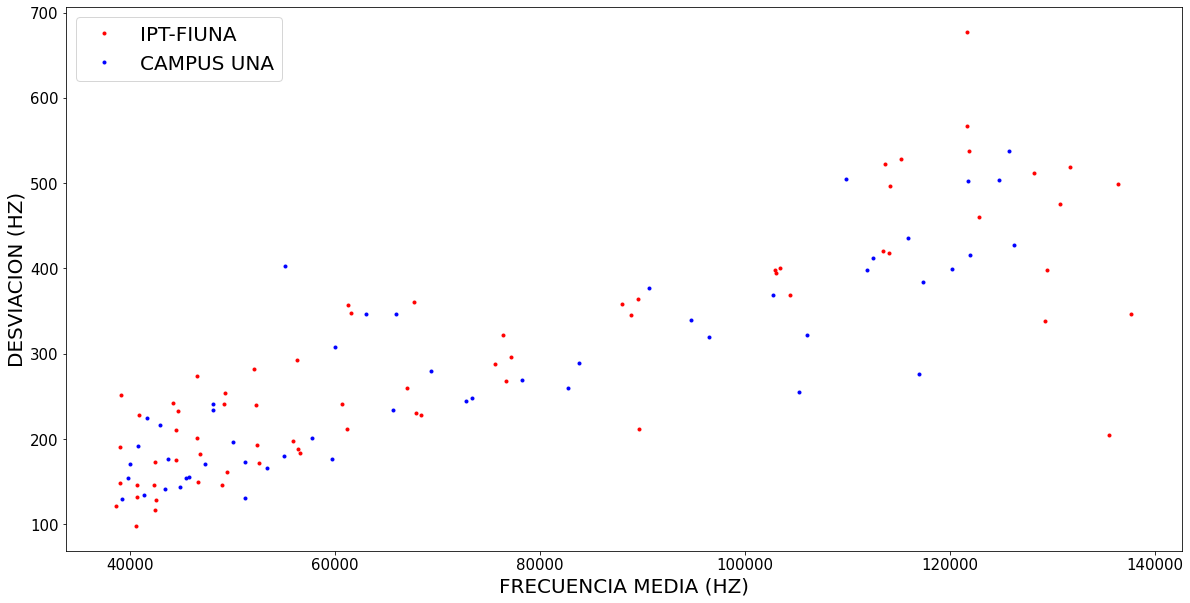

In [161]:
ERRORIPT = []

ERRORUNA = []


Datos = [Datos1,Datos2,Datos3,Datos4,Datos5,Datos6,Datos7]

#DATOS = [] 

#for Dat in Datos:
    
 #   DATOS.append(Dat[Dat.MediaINT<70000])

#Datos = DATOS    
    
plt.figure(figsize=(20,10))


for i in range(7):
    if i<4:
        if i==0: plt.plot(Datos[i].MediaINT,Datos[i].DVINT,'o',c='r',ms=3,label='IPT-FIUNA')
        else: plt.plot(Datos[i].MediaINT,Datos[i].DVINT,'o',c='r',ms=3)
        print('IPT-FIUNA',np.mean(Datos[i].DVINT))
        ERRORIPT.append(Datos[i].DVINT.values[:])
    else:
        if i==4: plt.plot(Datos[i].MediaINT,Datos[i].DVINT,'o',c='b',ms=3,label='CAMPUS UNA')
        else: plt.plot(Datos[i].MediaINT,Datos[i].DVINT,'o',c='b',ms=3)
        print('UNA',np.mean(Datos[i].DVINT))
        ERRORUNA.append(Datos[i].DVINT.values[:])
        
plt.legend(fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('FRECUENCIA MEDIA (HZ)',fontsize=20)
plt.ylabel('DESVIACION (HZ)',fontsize=20)


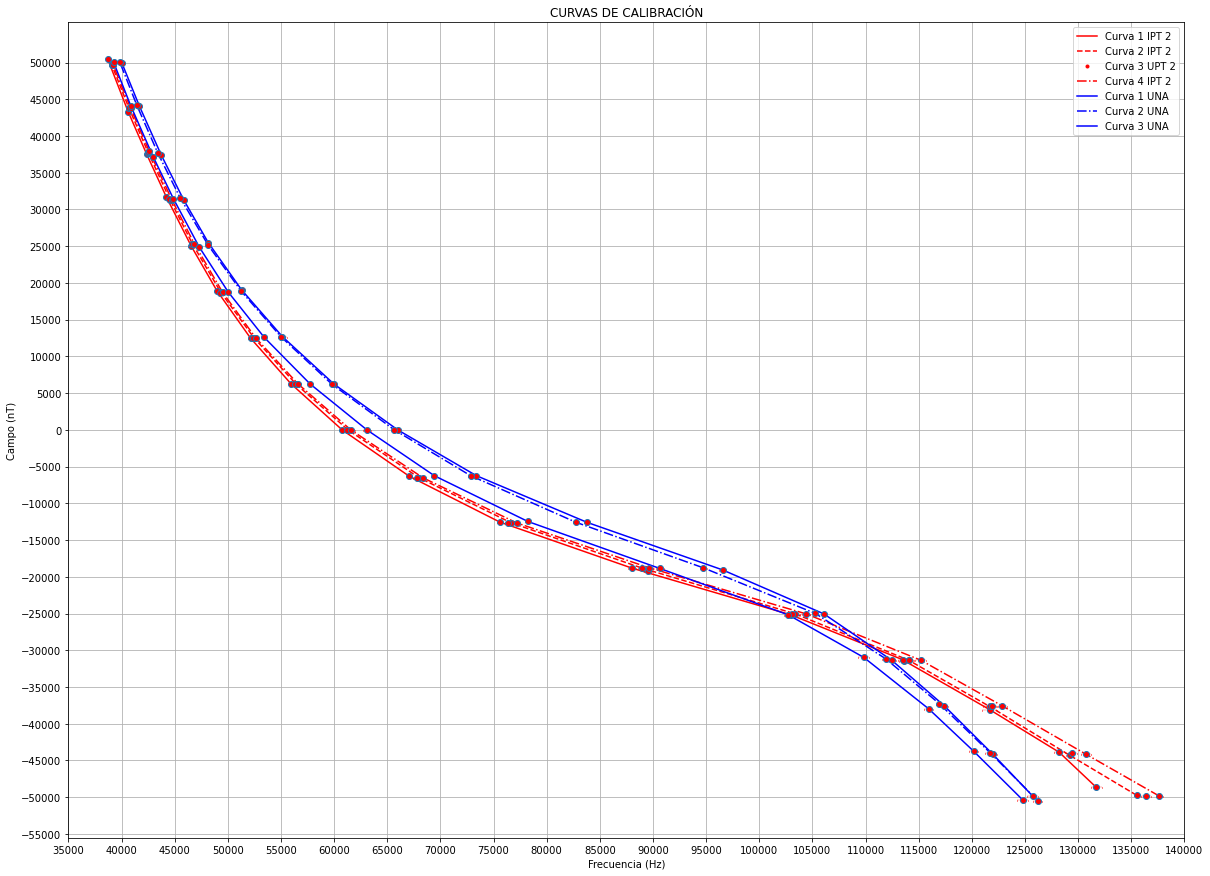

In [162]:
X_min=np.min(Datos1.MediaINT)
X_max=np.max(Datos1.MediaINT)
Y_min=np.min(Datos1.Campo_z)
Y_max=np.max(Datos1.Campo_z)

plt.figure(figsize=(20,15))

curm= plt.plot(Datos1.MediaINT,Datos1.Campo_z, '-r',label='Curva 1 IPT 2')
#cur= plt.plot(X1, Y1, "-", c='green', lw=0.4)
e=plt.errorbar(Datos1.MediaINT, Datos1.Campo_z,  xerr=Datos1.DVINT, linestyle='none', ecolor='r' ,marker='o', mfc='red', capsize=0.5, lw=0.3)

X_min=np.min(Datos2.MediaINT)
X_max=np.max(Datos2.MediaINT)
Y_min=np.min(Datos2.Campo_z)
Y_max=np.max(Datos2.Campo_z)

curm= plt.plot(Datos2.MediaINT,Datos2.Campo_z, '--r',label='Curva 2 IPT 2')
#cur= plt.plot(X1, Y1, "-", c='green', lw=0.4)
e=plt.errorbar(Datos2.MediaINT, Datos2.Campo_z,  xerr=Datos2.DVINT, linestyle='none', ecolor='r' ,marker='o', mfc='red', capsize=0.5, lw=0.3)

X_min=np.min(Datos3.MediaINT)
X_max=np.max(Datos3.MediaINT)
Y_min=np.min(Datos3.Campo_z)
Y_max=np.max(Datos3.Campo_z)

curm= plt.plot(Datos3.MediaINT,Datos3.Campo_z, '.r',label='Curva 3 UPT 2')
#cur= plt.plot(X1, Y1, "-", c='green', lw=0.4)
e=plt.errorbar(Datos3.MediaINT, Datos3.Campo_z,  xerr=Datos3.DVINT, linestyle='none', ecolor='r' ,marker='o', mfc='red', capsize=0.5, lw=0.3)

X_min=np.min(Datos4.MediaINT)
X_max=np.max(Datos4.MediaINT)
Y_min=np.min(Datos4.Campo_z)
Y_max=np.max(Datos4.Campo_z)

curm= plt.plot(Datos4.MediaINT,Datos4.Campo_z, '-.r',label='Curva 4 IPT 2')
#cur= plt.plot(X1, Y1, "-", c='green', lw=0.4)
e=plt.errorbar(Datos4.MediaINT, Datos4.Campo_z,  xerr=Datos4.DVINT, linestyle='none', ecolor='r' ,marker='o', mfc='red', capsize=0.5, lw=0.3)

X_min=np.min(Datos5.MediaINT)
X_max=np.max(Datos5.MediaINT)
Y_min=np.min(Datos5.Campo_z)
Y_max=np.max(Datos5.Campo_z)

curm= plt.plot(Datos5.MediaINT,Datos5.Campo_z, '-b',label='Curva 1 UNA')
#cur= plt.plot(X1, Y1, "-", c='green', lw=0.4)
e=plt.errorbar(Datos5.MediaINT, Datos5.Campo_z,  xerr=Datos5.DVINT, linestyle='none', ecolor='r' ,marker='o', mfc='red', capsize=0.5, lw=0.3)

X_min=np.min(Datos6.MediaINT)
X_max=np.max(Datos6.MediaINT)
Y_min=np.min(Datos6.Campo_z)
Y_max=np.max(Datos6.Campo_z)

curm= plt.plot(Datos6.MediaINT,Datos6.Campo_z, '-.b',label='Curva 2 UNA')
#cur= plt.plot(X1, Y1, "-", c='green', lw=0.4)
e=plt.errorbar(Datos6.MediaINT, Datos6.Campo_z,  xerr=Datos6.DVINT, linestyle='none', ecolor='r' ,marker='o', mfc='red', capsize=0.5, lw=0.3)

X_min=np.min(Datos7.MediaINT)
X_max=np.max(Datos7.MediaINT)
Y_min=np.min(Datos7.Campo_z)
Y_max=np.max(Datos7.Campo_z)

curm= plt.plot(Datos7.MediaINT,Datos7.Campo_z, '-b',label='Curva 3 UNA')
#cur= plt.plot(X1, Y1, "-", c='green', lw=0.4)
e=plt.errorbar(Datos7.MediaINT, Datos7.Campo_z,  xerr=Datos7.DVINT, linestyle='none', ecolor='r' ,marker='o', mfc='red', capsize=0.5, lw=0.3)

plt.ylabel('Campo (nT)')
plt.xlabel(r'Frecuencia (Hz)')

plt.xlim(X_min,X_max)
#plt.xlim(40000,65000)
plt.xticks(np.arange(35000, 145000, 5000)) 
plt.yticks(np.arange(-55000, 55000, 5000)) 

#plt.ylim(Y_min,Y_max)
plt.title('CURVAS DE CALIBRACIÓN')

plt.legend()

plt.grid()

#plt.show(1)

plt.savefig("Resultados_calibracion_UNAvsIPT.png", dpi=100)


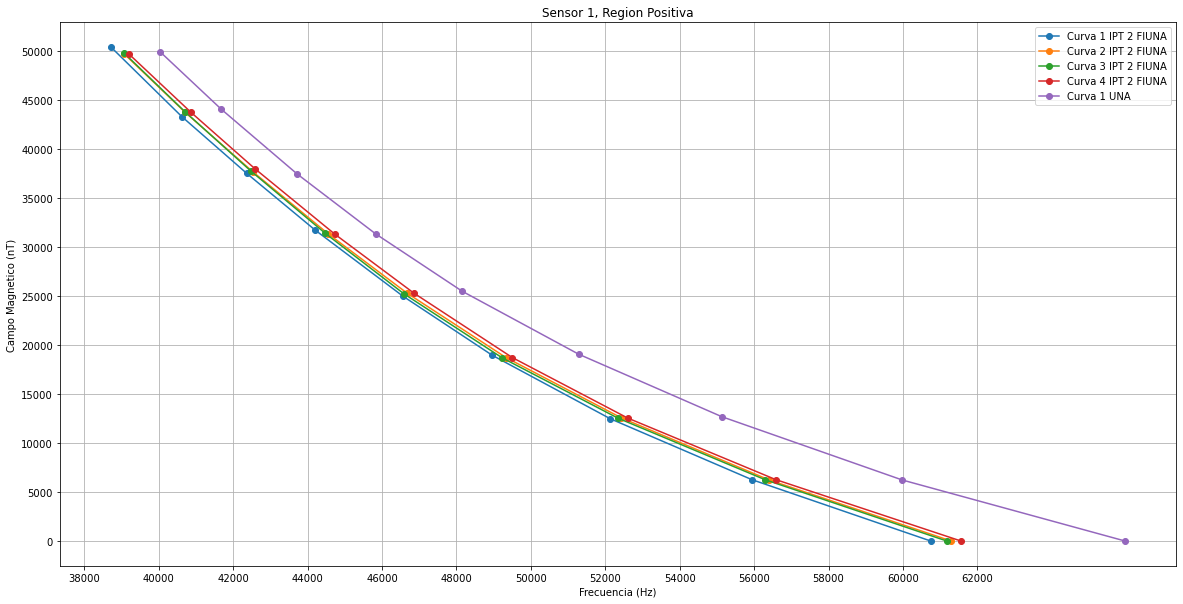

In [163]:
plt.figure(figsize=(20,10))

C1 = Datos1[ Datos1.Campo_z >= 0]

plt.plot(C1.MediaINT,C1.Campo_z,'-o',label='Curva 1 IPT 2 FIUNA')

C2 = Datos2[ Datos2.Campo_z >= 0]

plt.plot(C2.MediaINT,C2.Campo_z,'-o',label='Curva 2 IPT 2 FIUNA')

C3 = Datos3[ Datos3.Campo_z >= 0]

plt.plot(C3.MediaINT,C3.Campo_z,'-o',label='Curva 3 IPT 2 FIUNA')

C4 = Datos4[ Datos4.Campo_z >= 0]

plt.plot(C4.MediaINT,C4.Campo_z,'-o',label='Curva 4 IPT 2 FIUNA')


C5 = Datos5[ Datos5.Campo_z >= 0]

plt.plot(C5.MediaINT,C5.Campo_z,'-o',label='Curva 1 UNA')

"""
C6 = Datos6[ Datos6.Campo_z >= 0]

plt.plot(C6.MediaINT,C6.Campo_z,'-o',label='Curva 1 CAMPUS UNA')

C7 = Datos7[ Datos7.Campo_z >= 0]

plt.plot(C7.MediaINT,C7.Campo_z,'-o',label='Curva 2 CAMPUS UNA')
"""

plt.yticks(np.arange(0, 52000, 5000)) 

plt.xticks(np.arange(38000, 64000, 2000)) 

plt.grid()

plt.xlabel('Frecuencia (Hz)')

plt.ylabel('Campo Magnetico (nT)')

plt.legend()

plt.title('Sensor 1, Region Positiva')

plt.savefig('CURVAS_COMPARACION.png',dpi=100)


In [164]:
def Ajuste(Freq,Campo,label='Datos'):
    from scipy.optimize import curve_fit 

    y=Campo
    x = Freq

    def test(x, a, b, c): 
        return a*x**2+b*x+c

    #def test(x, a, b): 
    #    return a*x+b

    param, param_cov = curve_fit(test, x, y,absolute_sigma=True) 

    print("Parametros ajustados: ") 
    print(param) 
    print("Covarianza de parametros: ") 
    print(param_cov) 

    xx = np.linspace(np.min(x),np.max(x),100)    

    ans = (param[0]*xx**2+param[1]*xx+param[2]) 
    #ans = (param[0]*x+param[1]) 

    perr = np.sqrt(np.diag(param_cov))
    print('Error parametros=',perr)

    plt.plot(x, y, 'o', color ='red', label = label) 
    plt.plot(xx, ans, '--', color ='green') 
    #plt.plot(x, MUp, '-', color ='red', label ="Model error +") 
    #plt.plot(x, MDo, '-', color ='green', label ="Modelo error -") 

    plt.legend() 
    plt.show() 
    
    residuals = y- test(x, param[0],param[1],param[2])
    #residuals = y- test(x, param[0],param[1])

    ss_res = np.sum(residuals**2)

    ss_tot = np.sum((y-np.mean(y))**2)
    R_2 = 1 - (ss_res / ss_tot)

    print('Coeficiente de Determinación= ',R_2)
    
    return param


Parametros ajustados: 
[ 6.48063139e-05 -8.70937219e+00  2.90206636e+05]
Covarianza de parametros: 
[[ 5.64840613e-17 -5.59080837e-12  1.35470412e-07]
 [-5.59080837e-12  5.55692207e-07 -1.35194436e-02]
 [ 1.35470412e-07 -1.35194436e-02  3.30305543e+02]]
Error parametros= [7.51558789e-09 7.45447655e-04 1.81743100e+01]


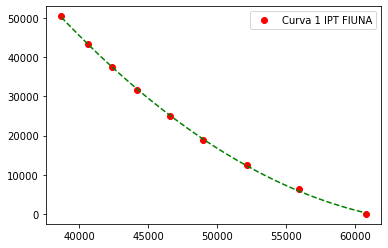

Coeficiente de Determinación=  0.999794249772175
Parametros ajustados: 
[ 6.40125630e-05 -8.63761978e+00  2.89261309e+05]
Covarianza de parametros: 
[[ 5.38882104e-17 -5.37636125e-12  1.31259051e-07]
 [-5.37636125e-12  5.38636076e-07 -1.32034673e-02]
 [ 1.31259051e-07 -1.32034673e-02  3.25018927e+02]]
Error parametros= [7.34085897e-09 7.33918303e-04 1.80282813e+01]


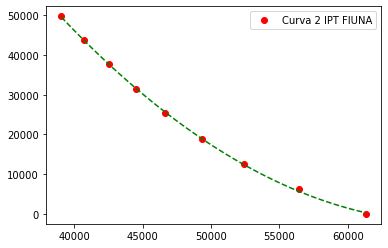

Coeficiente de Determinación=  0.999744820605837
Parametros ajustados: 
[ 6.61912616e-05 -8.86135498e+00  2.94747960e+05]
Covarianza de parametros: 
[[ 5.52244872e-17 -5.50350617e-12  1.34231022e-07]
 [-5.50350617e-12  5.50729016e-07 -1.34859217e-02]
 [ 1.34231022e-07 -1.34859217e-02  3.31608366e+02]]
Error parametros= [7.43131800e-09 7.42111188e-04 1.82101171e+01]


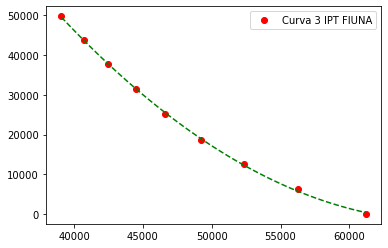

Coeficiente de Determinación=  0.999652911690898
Parametros ajustados: 
[ 6.35575471e-05 -8.60624566e+00  2.89233431e+05]
Covarianza de parametros: 
[[ 5.26142590e-17 -5.26906628e-12  1.29118256e-07]
 [-5.26906628e-12  5.29894384e-07 -1.30378789e-02]
 [ 1.29118256e-07 -1.30378789e-02  3.22154744e+02]]
Error parametros= [7.25356871e-09 7.27938448e-04 1.79486697e+01]


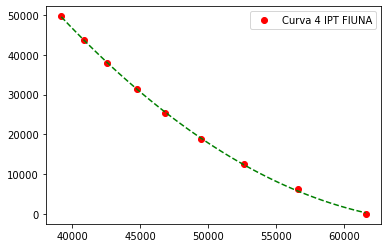

Coeficiente de Determinación=  0.999777553252284
Parametros ajustados: 
[ 5.42169825e-05 -7.61926298e+00  2.67310875e+05]
Covarianza de parametros: 
[[ 2.93817712e-17 -3.09176950e-12  7.91671186e-08]
 [-3.09176950e-12  3.26974424e-07 -8.41264776e-03]
 [ 7.91671186e-08 -8.41264776e-03  2.17542279e+02]]
Error parametros= [5.42049548e-09 5.71816775e-04 1.47493145e+01]


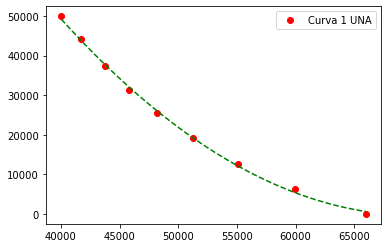

Coeficiente de Determinación=  0.998656904210600


In [165]:
y=C1.Campo_z
x = C1.MediaINT

param1 = Ajuste(x,y,label='Curva 1 IPT FIUNA')

y=C2.Campo_z
x = C2.MediaINT

param2 = Ajuste(x,y,label='Curva 2 IPT FIUNA')

y=C3.Campo_z
x = C3.MediaINT

param3 = Ajuste(x,y,label='Curva 3 IPT FIUNA')

y=C4.Campo_z
x = C4.MediaINT

param4 = Ajuste(x,y,label='Curva 4 IPT FIUNA')

y=C5.Campo_z
x = C5.MediaINT

param5 = Ajuste(x,y,label='Curva 1 UNA')

#y=C6.Campo_z
#x = C6.MediaINT

#param6 = Ajuste(x,y,label='Curva 3 IPT FIUNA')

#y=C8.Campo_z
#x = C8.MediaINT

#param8 = Ajuste(x,y,label='Curva 3 IPT FIUNA')


In [137]:
params

[array([ 6.48066145e-05, -8.70945657e+00,  2.90209520e+05]),
 array([ 6.40096459e-05, -8.63735141e+00,  2.89255206e+05]),
 array([ 6.61912616e-05, -8.86135498e+00,  2.94747960e+05]),
 array([ 6.35646633e-05, -8.60692171e+00,  2.89248751e+05]),
 array([ 6.44931125e-05, -8.63693292e+00,  2.87021227e+05])]

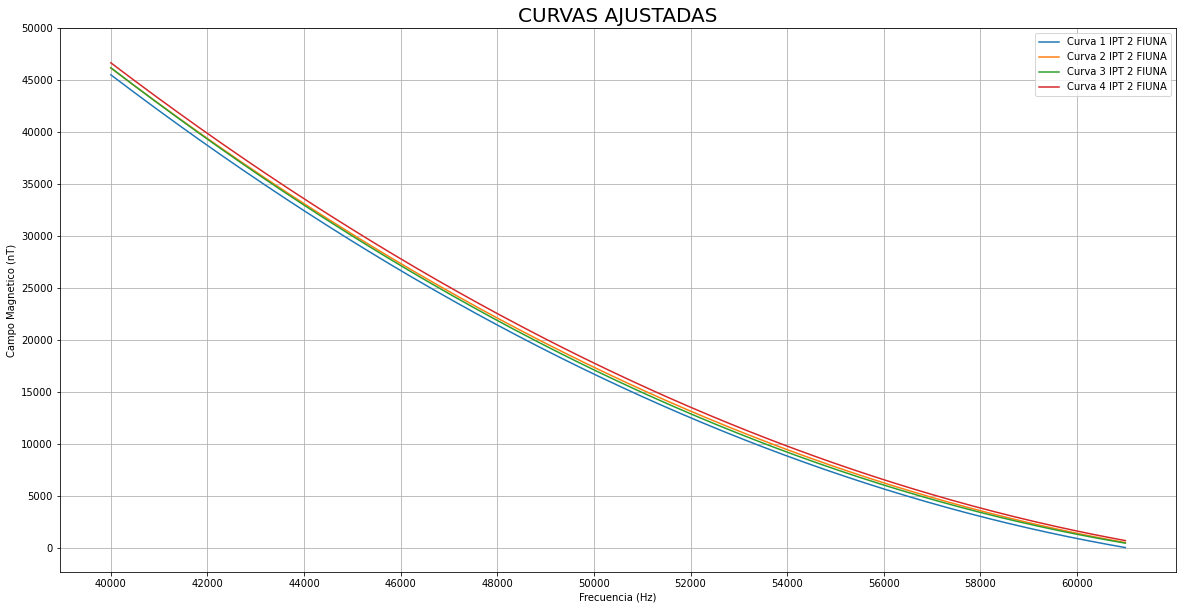

In [144]:
plt.figure(figsize=(20,10))

def Cuadratica(x,a,b,c):
    return a*x**2+b*x+c

xx = np.linspace(40000,61000,1000)

#ams = [param1,param2,param4,param5,param6,param8]
params = [param1,param2,param3,param4]

Curvas = []

for i in range(4):
    Curvas.append(Cuadratica(xx,params[i][0],params[i][1],params[i][2]))
    
plt.plot(xx,Curvas[0],label='Curva 1 IPT 2 FIUNA')
plt.plot(xx,Curvas[1],label='Curva 2 IPT 2 FIUNA')
plt.plot(xx,Curvas[2],label='Curva 3 IPT 2 FIUNA')
plt.plot(xx,Curvas[3],label='Curva 4 IPT 2 FIUNA')
#plt.plot(xx,Curvas[4], label='Curva 1 IPT 1 FIUNA')
#plt.plot(xx,Curvas[5], label='Curva 4 IPT FIUNA')

plt.xticks(np.arange(40000,61000,2000))
plt.yticks(np.arange(0,51000,5000))

plt.legend()
plt.grid()

plt.title('CURVAS AJUSTADAS',fontsize=(20))

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Campo Magnetico (nT)')

plt.savefig('CURVAS_AJUSTADAS_VARIAS_MEDICIONES.png',dpi=100)


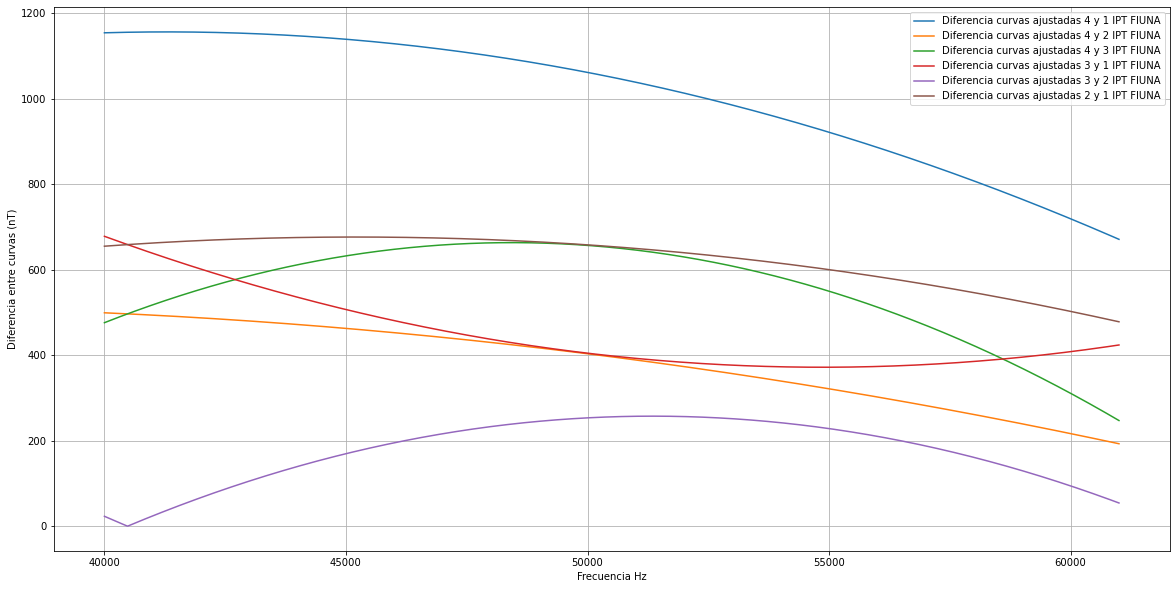

In [139]:
#plt.plot(xx,Curvas[0]-Curvas[1],label='Diferencia curvas ajustadas CAMPUS UNA')
#plt.plot(xx,Curvas[4]-Curvas[2],label='Diferencia curvas ajustadas 1 y 3 IPT FIUNA')
#plt.plot(xx,Curvas[3]-Curvas[4],label='Diferencia curvas ajustadas 3 y 2 IPT FIUNA')
#plt.plot(xx,Curvas[3]-Curvas[2],label='Diferencia curvas ajustadas 2 y 1 IPT FIUNA')

plt.figure(figsize=(20,10))

plt.plot(xx,abs(Curvas[3]-Curvas[0]),label='Diferencia curvas ajustadas 4 y 1 IPT FIUNA')
plt.plot(xx,abs(Curvas[3]-Curvas[1]),label='Diferencia curvas ajustadas 4 y 2 IPT FIUNA')
plt.plot(xx,abs(Curvas[3]-Curvas[2]),label='Diferencia curvas ajustadas 4 y 3 IPT FIUNA')

plt.plot(xx,abs(Curvas[2]-Curvas[0]),label='Diferencia curvas ajustadas 3 y 1 IPT FIUNA')
plt.plot(xx,abs(Curvas[2]-Curvas[1]),label='Diferencia curvas ajustadas 3 y 2 IPT FIUNA')

plt.plot(xx,abs(Curvas[1]-Curvas[0]),label='Diferencia curvas ajustadas 2 y 1 IPT FIUNA')

plt.legend()

plt.xlabel('Frecuencia Hz')
plt.ylabel('Diferencia entre curvas (nT)')

plt.grid()

plt.savefig('Diferencia_entre_curvas_ajustadas.png',dpi=100)

In [140]:
print('DIFERENCIA CURVAS 4 y 1 IPT FIUNA= ',np.mean(abs(Curvas[3]-Curvas[0])),'+/-',np.std(abs(Curvas[3]-Curvas[0])))

print('DIFERENCIA CURVAS 4 y 2 IPT FIUNA= ',np.mean(abs(Curvas[3]-Curvas[1])),'+/-',np.std(abs(Curvas[3]-Curvas[1])))

print('DIFERENCIA CURVAS 4 y 3 IPT FIUNA= ',np.mean(abs(Curvas[3]-Curvas[2])),'+/-',np.std(abs(Curvas[3]-Curvas[2])))

print('DIFERENCIA CURVAS 3 y 1 IPT FIUNA= ',np.mean(abs(Curvas[2]-Curvas[0])),'+/-',np.std(abs(Curvas[3]-Curvas[2])))

print('DIFERENCIA CURVAS 3 y 2 IPT FIUNA= ',np.mean(abs(Curvas[2]-Curvas[1])),'+/-',np.std(abs(Curvas[2]-Curvas[1])))

print('DIFERENCIA CURVAS 2 y 1 IPT FIUNA= ',np.mean(abs(Curvas[1]-Curvas[0])),'+/-',np.std(abs(Curvas[1]-Curvas[0])))


DIFERENCIA CURVAS 4 y 1 IPT FIUNA=  1004.0324287584484 +/- 145.4972896270959
DIFERENCIA CURVAS 4 y 2 IPT FIUNA=  379.3554930886623 +/- 89.7501391537229
DIFERENCIA CURVAS 4 y 3 IPT FIUNA=  554.8779778875769 +/- 109.06961956732047
DIFERENCIA CURVAS 3 y 1 IPT FIUNA=  449.15445087087153 +/- 109.06961956732047
DIFERENCIA CURVAS 3 y 2 IPT FIUNA=  176.06934332853572 +/- 73.87389025211539
DIFERENCIA CURVAS 2 y 1 IPT FIUNA=  624.6769356697862 +/- 57.375072656582745
